In [1]:
import numpy as np
import matplotlib.pyplot as plt
from dezero import Variable
import dezero.functions as F

In [2]:
# 토이 데이터셋
np.random.seed(0)
x = np.random.rand(100, 1)
y = 5 + 2 * x + np.random.rand(100, 1)
x, y = Variable(x), Variable(y)  # 생략 가능

In [3]:
# 매개변수 정의
W = Variable(np.zeros((1, 1)))
b = Variable(np.zeros(1))


In [4]:
# 예측 함수
def predict(x):
    y = F.matmul(x, W) + b  # 행렬의 곱으로 여러 데이터 일괄 계산
    return y


In [5]:
# 평균 제곱 오차(식 7.2) 계산 함수
def mean_squared_error(x0, x1):
    diff = x0 - x1
    return F.sum(diff ** 2) / len(diff)

In [6]:
# 경사 하강법으로 매개변수 갱신
lr = 0.1
iters = 100

In [7]:
for i in range(iters):
    y_pred = predict(x)
    loss = mean_squared_error(y, y_pred)
    # 또는 loss = F.mean_squared_error(y, y_pred)

    W.cleargrad()
    b.cleargrad()
    loss.backward()

    W.data -= lr * W.grad.data
    b.data -= lr * b.grad.data

    if i % 10 == 0:  # 10회 반복마다 출력
        print(loss.data)

42.296340129442335
0.24915731977561134
0.10078974954301652
0.09461859803040694
0.0902667138137311
0.08694585483964615
0.08441084206493275
0.08247571022229121
0.08099850454041051
0.07987086218625004


In [8]:
print('====')
print('W =', W.data)
print('b =', b.data)

====
W = [[2.11807369]]
b = [5.46608905]


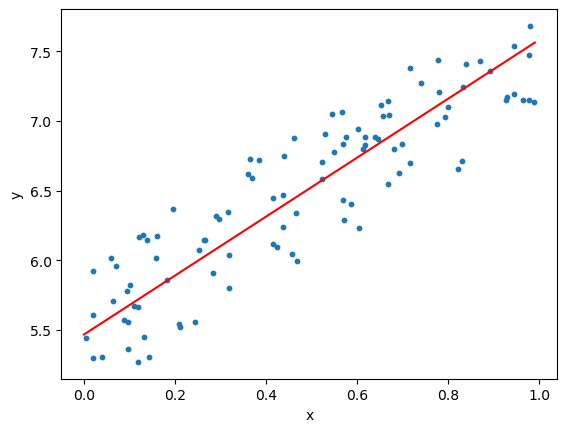

In [9]:
# [그림 7-9] 학습 후 모델
plt.scatter(x.data, y.data, s=10)
plt.xlabel('x')
plt.ylabel('y')
t = np.arange(0, 1, .01)[:, np.newaxis]
y_pred = predict(t)
plt.plot(t, y_pred.data, color='r')
plt.show()